In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load and save the dataset.
df = pd.read_csv('framingham.csv')

In [3]:
# Display data.
df.head()

,male,age,alcohol,cigsPerDay,totChol,diaBP,heartRate,glucose,TenYearCHD
0,1,39,0,0,195,70.0,80,77,0
1,0,46,0,0,250,81.0,95,76,0
2,1,48,1,20,245,80.0,75,70,0
3,0,61,1,30,225,95.0,65,103,1
4,0,46,1,23,285,84.0,85,85,0


In [4]:
# Data types
df.dtypes

male            int64
age             int64
alcohol         int64
cigsPerDay      int64
totChol         int64
diaBP         float64
heartRate       int64
glucose         int64
TenYearCHD      int64
dtype: object

In [5]:
# Shape of the data
df.shape

(4238, 9)

In [6]:
# Count the empty values.
df.isna().sum()

male          0
age           0
alcohol       0
cigsPerDay    0
totChol       0
diaBP         0
heartRate     0
glucose       0
TenYearCHD    0
dtype: int64

In [7]:
# Basic statistics.
df.describe()

,male,age,alcohol,cigsPerDay,totChol,diaBP,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,8.941482,233.928740,82.893464,75.861019,74.462482,0.151958
std,0.495022,8.572160,0.500024,11.902399,51.169478,11.910850,12.081533,32.869879,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,205.000000,75.000000,68.000000,68.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,233.000000,82.000000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,262.000000,89.875000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,696.000000,142.500000,143.000000,394.000000,1.000000


In [8]:
# Duplicate rows.
df=df.drop_duplicates()
print(df)

      male  age  alcohol  cigsPerDay  totChol  diaBP  heartRate  glucose  \
0        1   39        0           0      195   70.0         80       77   
1        0   46        0           0      250   81.0         95       76   
2        1   48        1          20      245   80.0         75       70   
3        0   61        1          30      225   95.0         65      103   
4        0   46        1          23      285   84.0         85       85   
...    ...  ...      ...         ...      ...    ...        ...      ...   
4233     1   50        1           1      313   92.0         66       86   
4234     1   51        1          43      207   80.0         65       68   
4235     0   48        1          20      248   72.0         84       86   
4236     0   44        1          15      210   87.0         86        0   
4237     0   52        0           0      269   83.0         80      107   

      TenYearCHD  
0              0  
1              0  
2              0  
3          

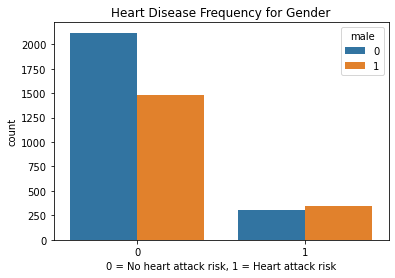

In [9]:
# Check heart attack risk compared to gender.
import matplotlib.pyplot as plt
sns.countplot(x = 'TenYearCHD', data = df, hue = 'male')
plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = No heart attack risk, 1 = Heart attack risk");

<AxesSubplot:>

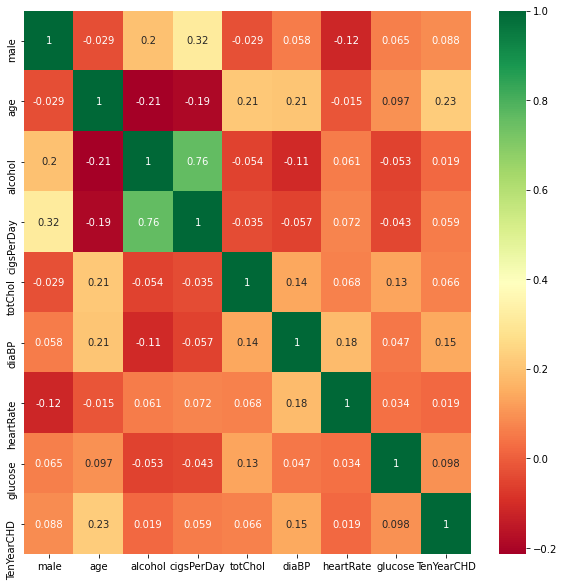

In [10]:
# Visualize the data.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

In [11]:
# Spit into feature and target data.
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [12]:
# Split into 70% training and 30% testing data.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [13]:
# Use LinearRegression.
from sklearn.linear_model import LinearRegression
risk_prediction_model = LinearRegression()
risk_prediction_model.fit(X_train, Y_train)

# Predicting the Test results.
risk_prediction_model_prediction = risk_prediction_model.predict(X_test)

# Model Accuracy.
from sklearn.metrics import accuracy_score
risk_prediction_model_accuracy = accuracy_score(risk_prediction_model_prediction.round(), Y_test) * 100
print('Model Accuracy :' + str(risk_prediction_model_accuracy))

Model Accuracy :86.9496855345912


In [14]:
import joblib
# Save model in 'RiskPredictionModel' directory
joblib.dump(risk_prediction_model,'./RiskPredictionModel/risk_prediction_model.joblib')

['./RiskPredictionModel/risk_prediction_model.joblib']